In [1]:
# Useful additional packages
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi

In [2]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer

backend = BasicAer.get_backend('unitary_simulator')

In [15]:
#number of qubits = nq
nq=3

# Create a Quantum Circuit acting on a quantum register of i qubits
circ = QuantumCircuit(nq)

# Add a X (NOT) gates
i=0
while i<nq:
    circ.x(i)
    i+=1
j=0
while j<2:
    
    k=1
    while k<nq:
        circ.crz(0.2*pi,k-1,k)
        k+=1
        
    i=0
    while i<nq:
        circ.x(i)
        i+=1
    
    j+=1

k=1
while k<nq:
    circ.crz(0.2*pi,k-1,k)
    k+=1
    
i=0
while i<nq:
    circ.z(i)
    circ.x(i)
    i+=1

k=1
while k<nq:
    circ.crz(0.2*pi,k-1,k)
    k+=1

In [16]:
circ.draw()

┌───┐              ┌───┐                      ┌───┐                   »
q_0: ┤ X ├─────■────────┤ X ├─────────────■────────┤ X ├─────────────■─────»
     ├───┤┌────┴────┐   └───┘   ┌───┐┌────┴────┐   └───┘   ┌───┐┌────┴────┐»
q_1: ┤ X ├┤ RZ(π/5) ├─────■─────┤ X ├┤ RZ(π/5) ├─────■─────┤ X ├┤ RZ(π/5) ├»
     ├───┤└─────────┘┌────┴────┐├───┤└─────────┘┌────┴────┐├───┤└─────────┘»
q_2: ┤ X ├───────────┤ RZ(π/5) ├┤ X ├───────────┤ RZ(π/5) ├┤ X ├───────────»
     └───┘           └─────────┘└───┘           └─────────┘└───┘           »
«        ┌───┐   ┌───┐                           
«q_0: ───┤ Z ├───┤ X ├──────────■────────────────
«        └───┘   ├───┤┌───┐┌────┴────┐           
«q_1: ─────■─────┤ Z ├┤ X ├┤ RZ(π/5) ├─────■─────
«     ┌────┴────┐├───┤├───┤└─────────┘┌────┴────┐
«q_2: ┤ RZ(π/5) ├┤ Z ├┤ X ├───────────┤ RZ(π/5) ├
«     └─────────┘└───┘└───┘           └─────────┘

In [17]:
# Create a Quantum Circuit
meas = QuantumCircuit(nq, nq)

# map the quantum measurement to the classical bits
meas.measure(range(nq), range(nq))

# The Qiskit circuit object supports composition using
# the addition operator.
qc = circ + meas

#drawing the circuit
qc.draw()

┌───┐              ┌───┐                      ┌───┐                   »
q_0: ┤ X ├─────■────────┤ X ├─────────────■────────┤ X ├─────────────■─────»
     ├───┤┌────┴────┐   └───┘   ┌───┐┌────┴────┐   └───┘   ┌───┐┌────┴────┐»
q_1: ┤ X ├┤ RZ(π/5) ├─────■─────┤ X ├┤ RZ(π/5) ├─────■─────┤ X ├┤ RZ(π/5) ├»
     ├───┤└─────────┘┌────┴────┐├───┤└─────────┘┌────┴────┐├───┤└─────────┘»
q_2: ┤ X ├───────────┤ RZ(π/5) ├┤ X ├───────────┤ RZ(π/5) ├┤ X ├───────────»
     └───┘           └─────────┘└───┘           └─────────┘└───┘           »
c: 3/══════════════════════════════════════════════════════════════════════»
                                                                           »
«        ┌───┐   ┌───┐                           ┌─┐      
«q_0: ───┤ Z ├───┤ X ├──────────■────────────────┤M├──────
«        └───┘   ├───┤┌───┐┌────┴────┐           └╥┘┌─┐   
«q_1: ─────■─────┤ Z ├┤ X ├┤ RZ(π/5) ├─────■──────╫─┤M├───
«     ┌────┴────┐├───┤├───┤└─────────┘┌────┴────┐ ║ └╥┘┌─┐
«q_2: ┤ RZ(π/5) ├┤ Z ├┤ X ├───────────┤ RZ(π/5) ├─╫──╫─┤M├
«     └─────────┘└───┘└───┘           └─────────┘ ║  ║ └╥┘
«c: 3/════════════════════════════════════════════╩══╩══╩═
«                                                 0  1  2

In [18]:
# Import Aer
from qiskit import Aer

# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=2000)

# Grab the results from the job.
result_sim = job_sim.result()

In [19]:
counts = result_sim.get_counts(qc)
print(counts)

{'000': 2000}


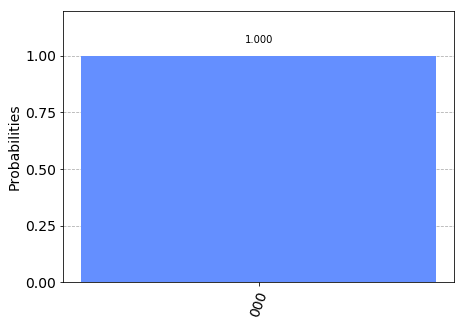

In [20]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [21]:
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere
from qiskit.visualization import plot_bloch_vector
%matplotlib inline

In [22]:
# execute the quantum circuit
backend = BasicAer.get_backend('statevector_simulator') # the device to run on
result = execute(qc, backend).result()
psi  = result.get_statevector(qc)

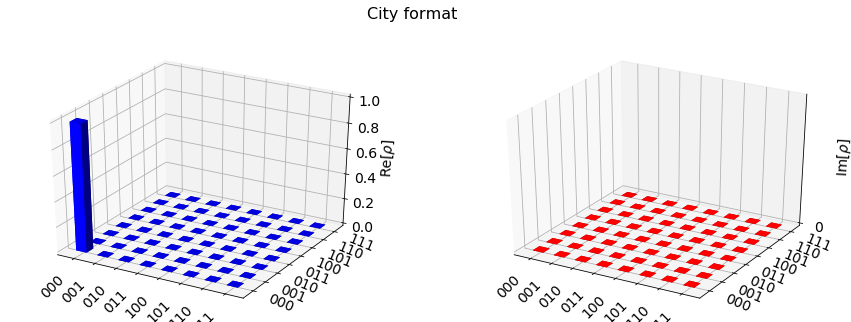

In [23]:
plot_state_city(psi, title="City format", color=['b','r'])

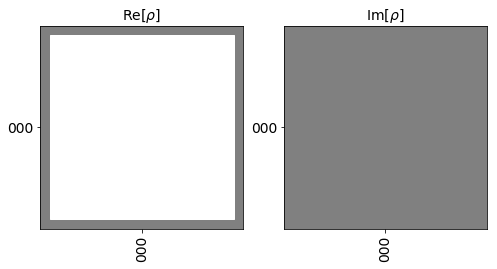

In [24]:
plot_state_hinton(psi)

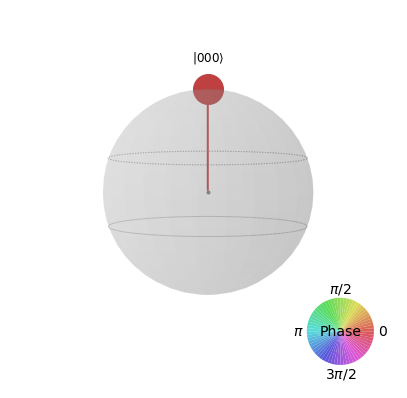

In [25]:
plot_state_qsphere(psi)

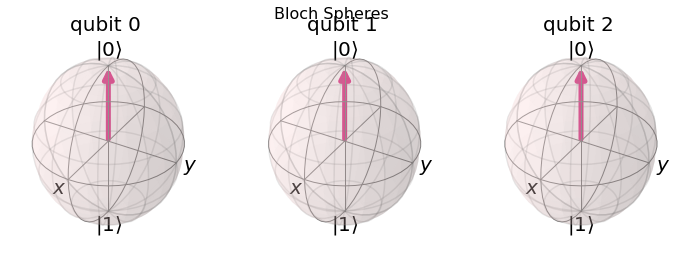

In [26]:
plot_bloch_multivector(psi, title="Bloch Spheres")